# Grid Stability Classification Using Deep Learning

***DESCRIPTION OF THE DATASET***

The analysis is performed for different sets of input values using the methodology similar to that described in [SchÃ¤fer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.]. Several input values are kept the same: averaging time: 2 s; coupling strength: 8 s^-2; damping: 0.1 s^-1

Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable) 

In [1]:
import pandas as pd
import numpy as np

## 1. Reading and analysing the dataset:

In [2]:
df = pd.read_csv("data.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


#### Preprocessing step: Label Encoding the target variable (stabf)

In [4]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'stabf'. 
df['stabf'] = label_encoder.fit_transform(df['stabf'])

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [6]:
print("Encoded classes:\n")
print("0 : ", label_encoder.inverse_transform([0]))
print("1 : ", label_encoder.inverse_transform([1]))

Encoded classes:

0 :  ['stable']
1 :  ['unstable']


## 2. Building the model

In [8]:
from keras.models import Sequential
from keras.layers import Dense

# split into input (X) and output (y) variables
X = df.drop('stabf', axis = 1)
y = df['stabf']

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim = 13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## 3. Training the model

#### Splitting into training and testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### Fit the model

In [10]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 10, verbose = 2)

W1103 01:21:19.667834  4760 deprecation_wrapper.py:119] From C:\Users\ckris\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 6400 samples, validate on 1600 samples
Epoch 1/200
 - 4s - loss: 0.5730 - acc: 0.7053 - val_loss: 0.5008 - val_acc: 0.7575
Epoch 2/200
 - 2s - loss: 0.4691 - acc: 0.7784 - val_loss: 0.4260 - val_acc: 0.8069
Epoch 3/200
 - 2s - loss: 0.3971 - acc: 0.8214 - val_loss: 0.3667 - val_acc: 0.8512
Epoch 4/200
 - 2s - loss: 0.3350 - acc: 0.8575 - val_loss: 0.3216 - val_acc: 0.8494
Epoch 5/200
 - 2s - loss: 0.2859 - acc: 0.8817 - val_loss: 0.2605 - val_acc: 0.8994
Epoch 6/200
 - 2s - loss: 0.2463 - acc: 0.8991 - val_loss: 0.2417 - val_acc: 0.8906
Epoch 7/200
 - 2s - loss: 0.2142 - acc: 0.9177 - val_loss: 0.1981 - val_acc: 0.9300
Epoch 8/200
 - 2s - loss: 0.1867 - acc: 0.9297 - val_loss: 0.1758 - val_acc: 0.9387
Epoch 9/200
 - 2s - loss: 0.1643 - acc: 0.9402 - val_loss: 0.1765 - val_acc: 0.9212
Epoch 10/200
 - 2s - loss: 0.1462 - acc: 0.9472 - val_loss: 0.1461 - val_acc: 0.9425
Epoch 11/200
 - 2s - loss: 0.1350 - acc: 0.9486 - val_loss: 0.1348 - val_acc: 0.9456
Epoch 12/200
 - 2s - loss:

Epoch 97/200
 - 2s - loss: 0.0124 - acc: 0.9953 - val_loss: 0.0137 - val_acc: 0.9937
Epoch 98/200
 - 2s - loss: 0.0196 - acc: 0.9920 - val_loss: 0.0231 - val_acc: 0.9919
Epoch 99/200
 - 2s - loss: 0.0138 - acc: 0.9942 - val_loss: 0.1152 - val_acc: 0.9687
Epoch 100/200
 - 2s - loss: 0.0141 - acc: 0.9955 - val_loss: 0.0187 - val_acc: 0.9906
Epoch 101/200
 - 2s - loss: 0.0141 - acc: 0.9936 - val_loss: 0.0297 - val_acc: 0.9869
Epoch 102/200
 - 2s - loss: 0.0128 - acc: 0.9952 - val_loss: 0.0141 - val_acc: 0.9944
Epoch 103/200
 - 2s - loss: 0.0158 - acc: 0.9939 - val_loss: 0.0251 - val_acc: 0.9875
Epoch 104/200
 - 2s - loss: 0.0126 - acc: 0.9950 - val_loss: 0.0133 - val_acc: 0.9919
Epoch 105/200
 - 2s - loss: 0.0124 - acc: 0.9952 - val_loss: 0.0193 - val_acc: 0.9894
Epoch 106/200
 - 2s - loss: 0.0126 - acc: 0.9956 - val_loss: 0.0116 - val_acc: 0.9969
Epoch 107/200
 - 2s - loss: 0.0129 - acc: 0.9952 - val_loss: 0.0119 - val_acc: 0.9950
Epoch 108/200
 - 2s - loss: 0.0122 - acc: 0.9952 - val_lo

Epoch 193/200
 - 2s - loss: 0.0078 - acc: 0.9969 - val_loss: 0.0215 - val_acc: 0.9900
Epoch 194/200
 - 2s - loss: 0.0074 - acc: 0.9973 - val_loss: 0.0104 - val_acc: 0.9950
Epoch 195/200
 - 2s - loss: 0.0154 - acc: 0.9952 - val_loss: 0.0081 - val_acc: 0.9969
Epoch 196/200
 - 2s - loss: 0.0082 - acc: 0.9962 - val_loss: 0.0199 - val_acc: 0.9906
Epoch 197/200
 - 2s - loss: 0.0083 - acc: 0.9967 - val_loss: 0.0255 - val_acc: 0.9894
Epoch 198/200
 - 2s - loss: 0.0063 - acc: 0.9972 - val_loss: 0.0153 - val_acc: 0.9912
Epoch 199/200
 - 2s - loss: 0.0106 - acc: 0.9955 - val_loss: 0.0146 - val_acc: 0.9919
Epoch 200/200
 - 2s - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0862 - val_acc: 0.9787


In [11]:
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


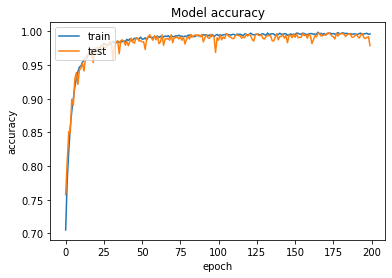

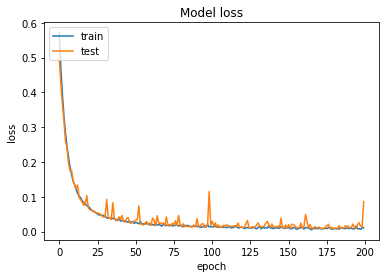

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 4. Making predictions on the test set

In [14]:
predictions = model.predict_classes(X_test)

In [15]:
print("Encoded classes:\n")
print("0 : ", label_encoder.inverse_transform([0]))
print("1 : ", label_encoder.inverse_transform([1]))

Encoded classes:

0 :  ['stable']
1 :  ['unstable']


In [16]:
print("Predicted class\t\tActual class")
for i in range(0, len(predictions)):
    print(predictions[i],"\t\t\t\t", y_test.iloc[i])    

Predicted class		Actual class
[1] 				 1
[0] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[0] 				 0
[0] 				 0
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[0] 				 0
[0] 				 0
[0] 				 0
[1

[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[0] 				 0
[0] 				 0
[1] 				 1
[0] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[1] 				 1
[0] 				 0
[0] 				 0
[0] 				 0
[1] 				 1
[1] 				 1
[1] 				 1
[0] 				 0
[1] 				 1
[1] 				 1
[0] 				 0

## 5. Visualising the performance of the model

In [17]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, predictions)

In [18]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy = {:0.2f}%; misclass = {:0.2f}%'.format(accuracy*100, misclass*100))
    plt.show()

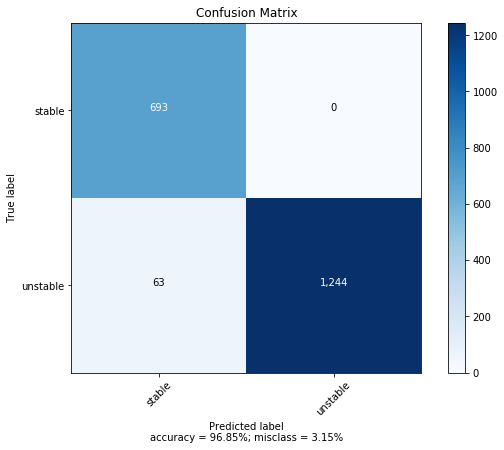

In [22]:
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix")